# 概览(Brief):20241101

In [1]:
repday='20241101'
lastday='20241031'

## 1. 新闻
###  1.1 新浪财经首页截屏

In [2]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager
import time
import os

#sina.png保存首页财经新闻截图
def getSinaShot():
    sinafile='sina.png'
    if not os.path.exists(sinafile):
        driver = webdriver.Edge(service=EdgeService(EdgeChromiumDriverManager().install()))
        driver.implicitly_wait(10)
        driver.get("https://finance.sina.com.cn")
        time.sleep(5)
        popup=driver.find_element(By.CLASS_NAME,"SNP-layer")
        if popup:
            driver.find_element(By.CLASS_NAME,"snp-btn-close-new").click()

        #移动到新闻关键页面位置
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight/20);")
        driver.save_screenshot(sinafile)
        driver.close()
    
getSinaShot()

![首页新闻](sina.png)

### 1.2 东方财富国内早盘新闻 

In [3]:
import akshare as ak
from datetime import datetime, time
import pandas as pd

news_dfgn = ak.stock_info_cjzc_em()
news_dfgn['发布时间']=pd.to_datetime(news_dfgn['发布时间'])
news_dfgn[news_dfgn['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,东方财富财经早餐 11月11日周一,【财经早餐】1、财政部部长蓝佛安：今年起直接增加地方化债资源10万亿元。2、国常会审议通过《...,2024-11-11 06:00:50,http://finance.eastmoney.com/a/202411103234805...
1,东方财富财经早餐 11月8日周五,【财经早餐】1、美联储宣布降息25个基点，鲍威尔称可能有必要放缓降息步伐。2、证监会副主席李...,2024-11-08 06:00:00,http://finance.eastmoney.com/a/202411083233044...
2,东方财富财经早餐 11月7日周四,【财经早餐】1、特朗普宣布在2024年美国总统选举中获胜。2、工信部对新型储能制造业高质量发...,2024-11-07 06:00:40,http://finance.eastmoney.com/a/202411063231504...
3,东方财富财经早餐 11月6日周三,【财经早餐】1、李强出席第七届中国国际进口博览会开幕式并发表主旨演讲。2、央行行长潘功胜：加...,2024-11-06 06:00:55,http://finance.eastmoney.com/a/202411053230012...
4,东方财富财经早餐 11月5日周二,【财经早餐】1、全国人大常委会审议增加地方政府债务限额置换存量隐性债务的议案。2、国资委：确...,2024-11-05 06:00:20,http://finance.eastmoney.com/a/202411053228604...
5,东方财富财经早餐 11月4日周一,【财经早餐】1、六部门：允许外国自然人战略投资，持股锁定最少12个月。2、上交所：始终对各类...,2024-11-04 06:00:11,http://finance.eastmoney.com/a/202411043227366...
6,东方财富财经早餐 11月1日周五,【财经早餐】1、《求是》杂志发表习近平总书记重要文章《促进高质量充分就业》。2、央行：10月...,2024-11-01 06:00:16,http://finance.eastmoney.com/a/202410313225146...
7,东方财富财经早餐 10月31日周四,【财经早餐】1、国家发展改革委等六部门：大力实施可再生能源替代行动。2、深交所召开创业板高质...,2024-10-31 06:00:04,http://finance.eastmoney.com/a/202410313223659...


### 1.3 东方财富国际新闻

In [4]:
news_dfgj = ak.stock_info_global_em()
news_dfgj['发布时间']=pd.to_datetime(news_dfgj['发布时间'])
news_dfgj[news_dfgj['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,大禹节水与南非灌溉发展局等签订合作协议,【大禹节水与南非灌溉发展局等签订合作协议】大禹节水消息，近日，由甘肃省委书记、省人大常委会主...,2024-11-11 11:56:17,https://finance.eastmoney.com/a/20241111323549...
1,陕西金融监管局：开展金融支持养老产业千亿行动,【陕西金融监管局：开展金融支持养老产业千亿行动】陕西金融监管局今日上午发文称，联合开展金融支...,2024-11-11 11:52:23,https://finance.eastmoney.com/a/20241111323549...
2,中国航发将携六十余型展品亮相第十五届中国航展,【中国航发将携六十余型展品亮相第十五届中国航展】第十五届中国国际航空航天博览会将于11月12...,2024-11-11 11:35:32,https://finance.eastmoney.com/a/20241111323549...
3,创业板指涨1.95% 芯片产业链爆发 多只高位股重挫,【午盘播报】沪指下跌0.08%，报3449.70点；深成指上涨1.19%，报11294.09...,2024-11-11 11:30:44,https://finance.eastmoney.com/a/20241111323549...
4,支付宝致歉：故障已修复 不会影响用户资金安全,【支付宝致歉：故障已修复 不会影响用户资金安全】@支付宝 发文称，因系统消息库出现局部故障，...,2024-11-11 11:28:00,https://finance.eastmoney.com/a/20241111323548...
...,...,...,...,...
195,固态电池市场热度升温 多家产业链企业披露最新进展,【固态电池市场热度升温 多家产业链企业披露最新进展】业内人士表示，从市场需求来看，消费者对电...,2024-11-11 00:06:33,https://finance.eastmoney.com/a/20241111323481...
196,证监会首席风险官、发行司司长严伯进：进一步促进投融资两端平衡 营造支持创新生态,【证监会首席风险官、发行司司长严伯进：进一步促进投融资两端平衡 营造支持创新生态】11月9日...,2024-11-11 00:06:31,https://finance.eastmoney.com/a/20241111323481...
197,“终结美联储”？马斯克支持,【“终结美联储”？马斯克支持】特斯拉和SpaceX的首席执行官埃隆·马斯克，表示支持让总统干...,2024-11-11 00:03:41,https://finance.eastmoney.com/a/20241111323481...
198,展品加速“变现” 消费企业掘金睡眠经济,【展品加速“变现” 消费企业掘金睡眠经济】从智能科技到完整解决方案，家居品牌借助进博会的契机...,2024-11-10 23:56:34,https://finance.eastmoney.com/a/20241110323481...


### 1.4 新浪国际财经

In [5]:
news_sinagj = ak.stock_info_global_sina()
news_sinagj['时间']=pd.to_datetime(news_sinagj['时间'])
news_sinagj[news_sinagj['时间']>lastday]

,时间,内容
0,2024-11-11 12:00:45,【港股午评：恒生指数跌2.12% 恒生科技指数跌1.52%】 港股午间收盘，恒生指数跌2.1...
1,2024-11-11 11:57:51,【付小波已任茅台酒销售公司党委副书记、总经理】根据微信公众号“销售公司学习宣传”消息，近期，...
2,2024-11-11 11:55:54,【机构称A股牛市特征显著，建议逢低布局三线索，可借道沪深300ETF南方（159925）一键...
3,2024-11-11 11:55:31,【德国总理朔尔茨与特朗普通电话，同意“共同努力让欧洲恢复和平”】 11月11日消息，德国政府...
4,2024-11-11 11:54:49,【大禹节水与南非灌溉发展局等签订合作协议】 大禹节水消息，近日，由甘肃省委书记、省人大常委会...
5,2024-11-11 11:54:41,【美国债市经历动荡一周 贝莱德、摩根大通认为颠簸起伏远未结束】特朗普上周赢得总统大选，引发债...
6,2024-11-11 11:54:19,【凯美特气：拟与三云公司、岳阳洞天进行二氧化碳、双氧水及气体回收综合利用项目合作】 凯美特气...
7,2024-11-11 11:53:43,【香港金管局：与多边组织加强亚洲气候投资的策略性伙伴合作】 香港金融管理局公告称，金管局今日...
8,2024-11-11 11:53:14,印度SENSEX30指数盘初跌0.49%报79093.7点，成分股多数下跌，其中1只个股涨幅...
9,2024-11-11 11:52:27,【陕西金融监管局：开展金融支持养老产业千亿行动】陕西金融监管局今日上午发文称，联合开展金融支...


## 2. 市场趋势
### 2.1 富时50、中证50


### 2.1 港股
恒生指数（HSI）最近30天

In [6]:
stock_hk_daily_hfq_df = ak.stock_hk_daily(symbol="HSI", adjust="")
stock_hk_daily_hfq_df

,date,open,high,low,close,volume
0,2013-08-20,22396.289,22481.740,21907.211,21964.051,6.352194e+10
1,2013-08-21,21964.689,21970.250,21618.600,21817.730,7.237452e+09
2,2013-08-22,21538.189,21944.471,21538.189,21895.400,8.229203e+09
3,2013-08-23,22006.410,22103.900,21769.039,21863.510,7.544465e+09
4,2013-08-26,21943.400,22116.000,21898.150,22005.320,7.672642e+09
...,...,...,...,...,...,...
2758,2024-11-04,20584.450,20633.580,20446.260,20567.520,1.238359e+10
2759,2024-11-05,20409.940,21006.970,20409.940,21006.969,1.750097e+10
2760,2024-11-06,20791.800,20859.660,20361.920,20538.381,1.888196e+10
2761,2024-11-07,20386.360,20986.310,20370.440,20953.340,2.403738e+10


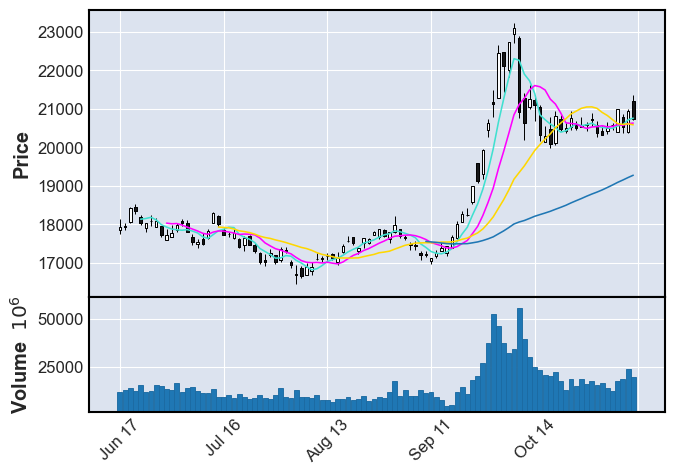

In [7]:
import mplfinance as mpf
import pandas as pd

# plot the stock DataFrame
# df: the DataFrame
# OCHLDict: {'columnName in Oiginal DF':'standard OCHLV names (initial capital)'}
def plotStock(df,OCHLVDict):
    #column
    gt_ul_index_plot=df.rename(columns=OCHLVDict)
    gt_ul_index_plot['Date']=pd.to_datetime(gt_ul_index_plot['Date'])
    gt_ul_index_plot=gt_ul_index_plot.set_index('Date')
    mpf.plot(gt_ul_index_plot,type='candle',volume=True,mav=(5,10,20,60,120,250))

#plot sina stock chart
def plotSinaStock(df,days):
    OCHLVDict={}
    for key in df.columns.to_list():
        new_key = key[0].upper() + key[1:].lower()
        OCHLVDict[key] = new_key
    plotStock(df.tail(days),OCHLVDict)
    
plotSinaStock(stock_hk_daily_hfq_df,100)

### 2.2 美国道琼斯

In [8]:
stock_dji_daily_df = ak.stock_us_daily(symbol=".DJI", adjust="")
stock_dji_daily_df

,date,open,high,low,close,volume
0,2004-01-02,10452.7402,10554.9600,10367.4102,10409.8496,168890000.0
1,2004-01-05,10411.8496,10575.9199,10411.8496,10544.0703,221290000.0
2,2004-01-06,10543.8496,10584.0703,10454.3701,10538.6602,191460000.0
3,2004-01-07,10535.4600,10587.5498,10432.0000,10529.0303,225490000.0
4,2004-01-08,10530.0703,10651.9902,10480.5898,10592.4404,237770000.0
...,...,...,...,...,...,...
5247,2024-11-04,42004.6602,42035.8711,41647.3008,41794.6016,341507920.0
5248,2024-11-05,41835.4883,42258.8398,41766.9609,42221.8789,283999978.0
5249,2024-11-06,42850.3984,43778.7812,42850.3984,43729.9297,555808505.0
5250,2024-11-07,43718.9219,43823.1016,43641.9219,43729.3398,437519634.0


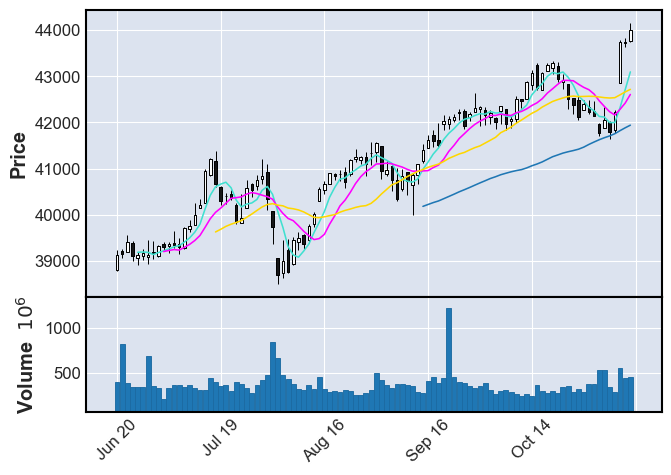

In [9]:
plotSinaStock(stock_dji_daily_df,100)

### 2.3 美国纳斯达克

In [10]:
stock_nasdaq_daily_df = ak.stock_us_daily(symbol=".IXIC", adjust="")
stock_nasdaq_daily_df

,date,open,high,low,close,volume
0,2004-01-02,2011.0800,2022.3700,1999.7700,2006.6801,1.666780e+09
1,2004-01-05,2020.7800,2047.3600,2020.7800,2047.3600,2.362910e+09
2,2004-01-06,2044.5500,2061.5400,2039.6300,2057.3701,2.273220e+09
3,2004-01-07,2056.7500,2078.0901,2047.0200,2077.6799,2.294280e+09
4,2004-01-08,2089.6001,2100.2500,2078.0500,2100.2500,2.683950e+09
...,...,...,...,...,...,...
5245,2024-11-04,18220.4258,18308.3008,18112.8301,18179.9844,4.758359e+09
5246,2024-11-05,18250.7070,18449.6758,18250.7070,18439.1699,6.397392e+09
5247,2024-11-06,18772.7617,19000.5000,18730.2070,18983.4648,6.354060e+09
5248,2024-11-07,19084.4277,19301.7012,19084.4277,19269.4590,8.525593e+09


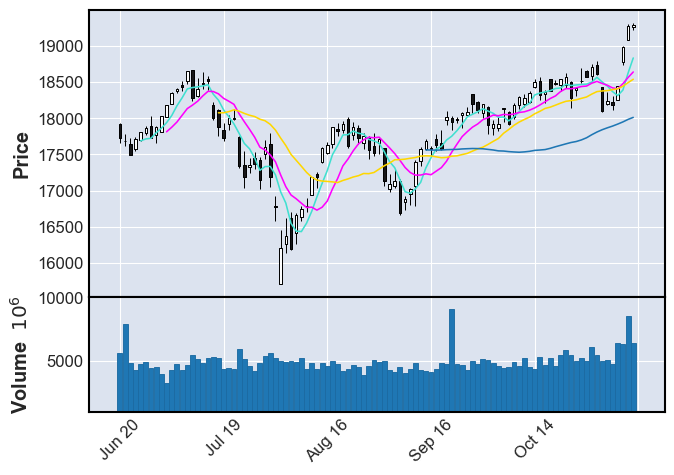

In [11]:
plotSinaStock(stock_nasdaq_daily_df,100)

## 3. 板块热点
### 2.1 昨日热点10大板块
昨天涨停股票分布的板块

In [12]:
#返回当日涨停股票DataFrame
def limitupList(date):
    collist=['所属行业','代码','名称','涨跌幅','首次封板时间','最后封板时间','炸板次数','涨停统计','连板数']
    stock_zt_pool_em_df = ak.stock_zt_pool_em(date=date)
    last_hs_10=stock_zt_pool_em_df[collist]
    return last_hs_10

last_hs_10=limitupList(lastday)
last_hs_10

,所属行业,代码,名称,涨跌幅,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数
0,通信设备,002583,海能达,9.984400,092500,144424,2,26/22,10
1,电力行业,000958,电投产融,10.011376,092500,092500,0,9/9,9
2,家电行业,000016,深康佳Ａ,10.000000,092500,092500,0,18/10,6
3,工程建设,002542,中化岩土,10.129870,092500,092500,0,12/10,6
4,美容护理,002094,青岛金王,9.953161,092500,092500,0,15/12,5
...,...,...,...,...,...,...,...,...,...
188,纺织服装,002269,美邦服饰,10.000000,142633,145309,1,1/1,1
189,半导体,603061,金海通,10.003902,143439,143439,0,1/1,1
190,电力行业,601778,晶科科技,10.000000,143842,145127,2,1/1,1
191,通用设备,300554,三超新材,19.991493,145139,145139,0,1/1,1


热点追踪：涨停行业汇总明细

In [13]:
grouped_df=last_hs_10.groupby('所属行业',observed=False).size().reset_index(name='计数')
grouped_df['占比']=grouped_df['计数']/grouped_df['计数'].sum()

sort_df=grouped_df.sort_values(by='计数', ascending=False)
sort_df.head(20)

,所属行业,计数,占比
56,通用设备,10,0.051813
5,光学光电,10,0.051813
4,光伏设备,9,0.046632
24,房地产开,9,0.046632
32,汽车零部,8,0.041451
22,工程建设,7,0.036269
54,软件开发,7,0.036269
27,文化传媒,5,0.025907
14,半导体,5,0.025907
0,专用设备,5,0.025907


In [14]:
top_10 = sort_df.head(10)
total_cumulative = top_10['占比'].sum()
judge='集中' if total_cumulative>0.5 else '不集中'
print(f'前10板块涨幅靠前累计占比：{total_cumulative}, 热点{judge}。')

前10板块涨幅靠前累计占比：0.38860103626943, 热点不集中。


### 2.2 今日热点
  
![今日涨幅国泰君安APP](gtja.png)

#### 2.2.1 集合竞价概念板块排名

In [15]:
#记录排名
# basename: 板块类型（概念板块、行业板块）
# start_time, end_time: 排名时间段
# sector: 板块名称
def recordRank(basename,start_time,end_time):
    now = datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'{basename}{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        if basename=='conceptRank':
            rank=ak.stock_board_concept_name_em()
        elif basename=='industryRank':
            rank=ak.stock_board_industry_name_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('非指定时间段，没有数据源.')
            rank=pd.DataFrame()
    if not rank.empty:
        mvtotal=rank['总市值'].sum()
        rank['市值比']=rank['总市值']/mvtotal
        rank['上涨家数%']=rank['上涨家数']/(rank['上涨家数']+rank['下跌家数'])
        columns=['排名','板块名称','板块代码','涨跌幅','市值比','换手率','上涨家数%','领涨股票','领涨股票-涨跌幅']
        rank=rank[columns]
    return rank

#排名靠前的板块的股票明细排名
# sectorRankDf: 板块排名DataFrame(recordRank生成)
# sectorNum,stockNum: 返回板块数、股票数
def top5sectorStocks(basename,start_time,end_time,sectorRankDf,sectorNum=5,stockNum=5):
    top5={}
    now = datetime.now()
    tStr = start_time.strftime("%Y%m%d%H%M")
    if sectorRankDf.empty:
        print('非指定时间段，没有数据源。')
    else:
        print('排名前5领涨板块成分股列表。')
        for sym in sectorRankDf['板块名称'].to_list()[:5]:
            csvfile=f'{basename}_{sym}{tStr}.txt'
            if now.time() < end_time and now.time() >= start_time:
                if basename=='conceptRank':
                    top5[sym]=ak.stock_board_concept_cons_em(sym)
                else:
                    top5[sym]=ak.stock_board_industry_cons_em(sym)
                top5[sym].to_csv(csvfile)
            else:
                if os.path.exists(csvfile):
                    top5[sym]=pd.read_csv(csvfile)
                else:
                    print('No record stored and not available from source.')
                    top5[sym]=pd.DataFrame()

            if not top5[sym].empty:
                atotal=top5[sym]['成交额'].sum()
                top5[sym]['成交额比']=top5[sym]['成交额']/atotal
                columns=['代码','名称','涨跌幅','成交额','换手率','市盈率-动态','市净率']
                top5[sym]=top5[sym][columns][:stockNum]
                print(f'板块：{sym}:\n{top5[sym]}\n\n')
    return top5   

In [16]:
#当天集合竞价阶段概念板块排名
basename='conceptRank'
start_time = time(9, 15)
end_time = time(9, 31)
rank0=recordRank(basename,start_time,end_time)
rank0.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,昨日涨停_含一字,BK1050,8.92,0.001733,0.0,0.985149,蒙草生态,20.03
1,2,昨日涨停,BK0815,8.90,0.001597,0.0,0.983871,许昌智能,29.99
2,3,昨日连板_含一字,BK1051,8.58,0.000766,0.0,0.988095,格林精密,20.02
3,4,昨日连板,BK0816,8.42,0.000565,0.0,0.983607,格林精密,20.02
4,5,血氧仪,BK1122,4.23,0.000087,0.0,0.777778,中科美菱,29.97
5,6,屏下摄像,BK0947,3.27,0.000359,0.0,0.857143,同兴达,10.01
6,7,第四代半导体,BK1121,3.23,0.000076,0.0,1.000000,衢州发展,8.84
7,8,电子车牌,BK0982,2.63,0.000110,0.0,0.666667,浩云科技,20.00
8,9,发电机概念,BK1014,2.48,0.000078,0.0,0.625000,科泰电源,20.03
9,10,万达概念,BK0831,2.28,0.000342,0.0,0.846154,顺发恒业,10.17


In [17]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank0)

排名前5领涨板块成分股列表。
板块：昨日涨停_含一字:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0  300355  蒙草生态  20.03  NaN  0.0  206.26   3.14
1  300176  派生科技  20.02  NaN  0.0   95.18   4.00
2  300968  格林精密  20.02  NaN  0.0  152.78   5.10
3  688502  茂莱光学  20.00  NaN  0.0  424.93  11.96
4  688225  亚信安全  20.00  NaN  0.0  -34.91   4.99


板块：昨日涨停:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0  831396  许昌智能  29.99  NaN  0.0   70.87   4.04
1  300355  蒙草生态  20.03  NaN  0.0  206.26   3.14
2  300176  派生科技  20.02  NaN  0.0   95.18   4.00
3  300968  格林精密  20.02  NaN  0.0  152.78   5.10
4  688502  茂莱光学  20.00  NaN  0.0  424.93  11.96


板块：昨日连板_含一字:
       代码    名称    涨跌幅  成交额  换手率   市盈率-动态    市净率
0  300968  格林精密  20.02  NaN  0.0   152.78   5.10
1  688010  福光股份  20.00  NaN  0.0  -129.69   3.53
2  300152   新动力  19.95  NaN  0.0 -2649.27  20.93
3  300010  豆神教育  19.90  NaN  0.0   192.92  26.29
4  300256  星星科技  19.03  NaN  0.0   -78.37  11.08


板块：昨日连板:
       代码    名称    涨跌幅  成交额  换手率   市盈率-动态    市净率
0  300968  格林精密 

#### 2.2.3 开盘后15分钟概念板块排名

In [18]:
start_time = time(9, 31)
end_time = time(9, 52)
rank1=recordRank(basename,start_time,end_time)
rank1.head(20)

非指定时间段，没有数据源.


""


排名前5概念板块领涨成分股

In [19]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank1)

非指定时间段，没有数据源。


#### 2.2.3 集合竞价行业板块涨跌幅

In [20]:
#当天集合竞价到开盘后30分钟涨跌幅排名
basename='industryRank'
start_time = time(9, 15)
end_time = time(9, 31)
rank3=recordRank(basename,start_time,end_time)
rank3.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,汽车服务,BK1016,2.50,0.000696,0.0,0.800000,申华控股,10.14
1,2,教育,BK0740,2.03,0.001081,0.0,0.500000,豆神教育,19.90
2,3,电源设备,BK1034,1.44,0.003754,0.0,0.590909,科泰电源,20.03
3,4,家用轻工,BK0440,1.43,0.002685,0.0,0.535714,泰鹏智能,26.66
4,5,包装材料,BK0733,1.40,0.001292,0.0,0.692308,王子新材,10.04
5,6,多元金融,BK0738,1.30,0.005486,0.0,0.470588,陕国投Ａ,9.95
6,7,能源金属,BK1015,1.28,0.003470,0.0,0.333333,中矿资源,10.01
7,8,光学光电子,BK1038,1.13,0.011745,0.0,0.612500,福光股份,20.00
8,9,房地产开发,BK0451,1.11,0.012431,0.0,0.631579,津投城开,10.18
9,10,航空机场,BK0420,0.98,0.006952,0.0,0.444444,海航控股,10.14


行业板块中成分股

In [21]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank3)

排名前5领涨板块成分股列表。
板块：汽车服务:
       代码    名称    涨跌幅  成交额  换手率   市盈率-动态   市净率
0  600653  申华控股  10.14  NaN  0.0   -78.91  8.13
1  838030  德众汽车   5.18  NaN  0.0   202.01  2.63
2  603377  ST东时   4.79  NaN  0.0    -9.73  0.84
3  600335  国机汽车   4.52  NaN  0.0    24.54  0.90
4  300825   阿尔特   1.19  NaN  0.0  3585.55  2.45


板块：教育:
       代码     名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0  300010   豆神教育  19.90  NaN  0.0  192.92  26.29
1    2607   中公教育  10.06  NaN  0.0   99.30  30.28
2  300338  *ST开元   9.32  NaN  0.0  -53.94 -17.52
3    3032   传智教育   2.89  NaN  0.0  -83.48   3.41
4  605098   行动教育   0.76  NaN  0.0   16.54   4.50


板块：电源设备:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态   市净率
0  300153  科泰电源  20.03  NaN  0.0   91.94  3.57
1    2630  华西能源  10.08  NaN  0.0   47.03  7.60
2  300105  龙源技术   3.91  NaN  0.0  136.58  2.25
3  301327  华宝新能   2.63  NaN  0.0   50.49  1.75
4    2366  融发核电   2.16  NaN  0.0 -622.27  2.34


板块：家用轻工:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态   市净率
0  873132  泰鹏智能  26.66  NaN  0.0  

#### 2.2.4 开盘15分钟行业板块涨跌幅

In [22]:
basename='industryRank'
start_time = time(9, 31)
end_time = time(9, 51)
rank4=recordRank(basename,start_time,end_time)
rank4.head(20)

非指定时间段，没有数据源.


""


行业板块中成分股

In [23]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank4)

非指定时间段，没有数据源。


### 2.2.5 集合竞价阶段涨停个股热点明细

In [24]:
def stockLimitUp(start_time,end_time):
    now = datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'limitUp{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        rank=ak.stock_zh_a_spot_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('No record stored and not available from source.')
            rank=pd.DataFrame()
    if not rank.empty:
        columns=['代码','名称','涨跌幅','量比','换手率','市盈率-动态','市净率','流通市值','涨速','5分钟涨跌','60日涨跌幅','年初至今涨跌幅']
        rank=rank[columns].sort_values(by='涨跌幅', ascending=False)
    return rank

In [25]:
start_time = time(9, 15)
end_time = time(9, 31)
openA = stockLimitUp(start_time,end_time)
openA.head(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,831396,许昌智能,29.99,NaN,0.0,70.87,4.04,1.281373e+09,0.00,29.99,171.12,182.95
1,832145,恒合股份,29.08,NaN,0.0,-94.56,4.49,7.620632e+08,19.97,29.08,230.10,117.39
2,873679,前进科技,28.30,NaN,0.0,50.93,2.52,3.678056e+08,-1.31,28.30,83.13,1.80
3,873132,泰鹏智能,26.66,NaN,0.0,67.93,5.61,3.945225e+08,-0.65,26.66,110.41,26.85
4,872351,华光源海,22.11,NaN,0.0,122.08,2.32,4.090211e+08,-5.61,22.11,87.40,27.47
6,300153,科泰电源,20.03,NaN,0.0,91.94,3.57,3.052786e+09,0.00,20.03,63.93,20.18
5,300355,蒙草生态,20.03,NaN,0.0,206.26,3.14,1.170718e+10,0.00,20.03,266.24,129.76
7,300176,派生科技,20.02,NaN,0.0,95.18,4.00,3.737260e+09,0.00,20.02,106.20,42.75
8,688292,浩瀚深度,20.02,NaN,0.0,73.50,3.46,2.056067e+09,0.00,20.02,54.53,-16.64
9,300968,格林精密,20.02,NaN,0.0,152.78,5.10,9.615219e+09,0.00,20.02,169.52,93.35


### 2.2.6 开盘15分钟涨停个股热点明细


In [26]:
start_time = time(9, 31)
end_time = time(9, 53)
open15 = stockLimitUp(start_time,end_time)
open15.head(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,833580,科创新材,30.00,8.78,8.44,135.48,4.29,9.157003e+08,0.00,0.00,184.87,103.23
1,831627,力王股份,30.00,13.29,19.58,104.69,6.14,1.320722e+09,0.00,0.00,252.63,136.07
2,603205,C健尔康,25.57,4.41,33.55,84.75,7.58,2.587102e+09,1.69,2.33,500.68,500.68
3,872953,国子软件,24.85,11.06,26.90,138.69,9.57,1.380231e+09,6.44,6.40,334.64,182.98
4,831961,创远信科,24.76,9.24,11.90,1391.27,4.72,2.624372e+09,1.38,-0.44,153.98,81.55
5,300173,福能东方,20.08,20.85,9.11,477.02,4.74,4.305493e+09,0.00,0.00,68.88,19.35
6,300484,蓝海华腾,20.01,6.62,12.21,205.84,8.95,4.534630e+09,0.00,0.00,99.06,121.25
7,688262,国芯科技,20.01,11.41,4.52,-55.21,4.17,7.372739e+09,0.00,0.00,69.03,-4.94
8,301222,浙江恒威,20.01,47.29,16.26,27.49,2.33,9.249955e+08,0.00,3.44,43.15,7.20
9,688656,浩欧博,20.00,36.72,8.21,204.47,8.98,7.241618e+09,0.00,0.00,421.05,234.23


#### 2.2.7 板块动态评析

本轮行情启动股票热点追踪（需要从历史行情中组合分析，现有股票涨停池昨日和今日都不稳定）

In [27]:
from datetime import datetime, timedelta

def get_stock_zt_pool(start_date, end_date):
    current_date = datetime.strptime(start_date, '%Y%m%d')
    end_date = datetime.strptime(end_date, '%Y%m%d')
    
    concat_zt_df = pd.DataFrame()

    while current_date <= end_date:
        date_str = current_date.strftime('%Y%m%d')
        try:
            stock_zt_pool_strong_em_df = ak.stock_zt_pool_previous_em(date=date_str)
            stock_zt_pool_strong_em_df['日期'] = pd.to_datetime(date_str)
            concat_zt_df = pd.concat([concat_zt_df, stock_zt_pool_strong_em_df], ignore_index=True)
        except Exception as e:
            print(f"Error fetching data for {date_str}: {e}")
        
        current_date += timedelta(days=1)
    
    return concat_zt_df

In [28]:
syclestart='20240925'
ak.stock_zt_pool_strong_em(date=syclestart)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 18 elements

In [29]:
#本轮行情启动日
syclestart='20240924'
result_df = get_stock_zt_pool(syclestart, lastday)
result_df

Error fetching data for 20240924: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20240925: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20240926: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240927: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20240928: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20240929: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20240930: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20241001: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20241002: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20241003: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20241004: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241005: Length mismatch: Expected axis has 1 elements, new values have 1

,序号,代码,名称,涨跌幅,最新价,涨停价,成交额,流通市值,总市值,换手率,涨速,振幅,昨日封板时间,昨日连板数,涨停统计,所属行业,日期
0,1,603909,建发合诚,0.222717,9.00,9.88,151492057,2.346058e+09,2.346058e+09,6.313843,0.671141,10.356347,093000,1,2/1,工程咨询,2024-10-16
1,2,603176,汇通集团,-4.356061,5.05,5.81,164306258,7.575124e+08,2.356679e+09,21.496712,0.397614,7.575758,103650,1,2/1,工程建设,2024-10-16
2,3,600807,济南高新,2.752294,3.36,3.60,289221056,2.644382e+09,2.972373e+09,11.058506,0.298507,7.339449,130834,1,2/1,医疗器械,2024-10-16
3,4,002193,如意集团,-3.164557,4.59,5.21,202795683,1.201267e+09,1.201274e+09,16.955719,0.218341,7.805907,104851,1,2/1,纺织服装,2024-10-16
4,5,002685,华东重机,3.516484,4.71,5.01,824759488,4.745590e+09,4.746223e+09,17.558390,0.212766,11.208792,100548,1,2/1,通用设备,2024-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,154,870199,倍益康,-9.177095,23.95,34.28,230946837,8.909758e+08,1.631230e+09,24.774996,-0.622407,25.142208,132255,1,2/1,医疗器械,2024-10-31
933,155,600635,大众公用,4.940711,5.31,5.57,2551969312,1.284378e+10,1.567743e+10,19.992466,-1.117318,12.252964,140405,4,5/4,燃气,2024-10-31
934,156,836717,瑞星股份,-9.083119,10.61,15.17,167066858,4.443468e+08,1.216755e+09,38.102802,-1.394052,18.423307,144349,1,2/1,专用设备,2024-10-31
935,157,600843,上工申贝,5.924596,17.70,18.38,2619467968,8.305242e+09,1.262305e+10,30.713791,-3.699674,9.994016,094421,6,9/7,专用设备,2024-10-31


## 4.个股市场


### 4.1 跟进股票列表
#### 4.1.1 历史K线

In [30]:
def plotDcStockSingle(df,days):
    OCHLVDict={'日期':'Date','开盘':'Open','收盘':'Close','最高':'High','最低':'Low','成交量':'Volume'}
    print(f'{days}K线图')
    plotStock(df.tail(days),OCHLVDict)

In [31]:
def plotDcStocks(stocksymb,periods):
    stockDict={}
    for p in periods:
        stockdf = ak.stock_zh_a_hist(symbol=stocksymb,period=p)
        stocknamedf=ak.stock_individual_info_em(symbol=stocksymb)
        stockname=stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1]
        stockDict[p]=stockdf
        print(f'{stockname}-周期：{p}\n{stockdf}')
        plotDcStockSingle(stockdf,100)
    stockDict['name']=stockname
    return stockDict

润和软件-周期：daily
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     2012-07-18  300339  28.00  23.90  28.00  23.21   150973  3.772116e+08   
1     2012-07-19  300339  24.40  24.07  25.30  23.71    93127  2.276391e+08   
2     2012-07-20  300339  24.00  24.19  24.78  23.92    61087  1.484579e+08   
3     2012-07-23  300339  23.51  23.20  23.59  21.78    60498  1.371628e+08   
4     2012-07-24  300339  23.60  25.52  25.52  23.50    81850  2.034769e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
2830  2024-10-28  300339  62.66  62.59  64.95  60.00  1681162  1.043254e+10   
2831  2024-10-29  300339  62.07  64.60  68.60  61.40  2334846  1.532336e+10   
2832  2024-10-30  300339  63.00  77.52  77.52  62.26  2714457  1.933974e+10   
2833  2024-10-31  300339  82.99  72.00  84.84  68.60  3405911  2.695133e+10   
2834  2024-11-01  300339  69.50  63.95  71.88  62.30  1235123  8.256564e+09   

         振幅    涨跌幅    涨跌额    换手率  
0 

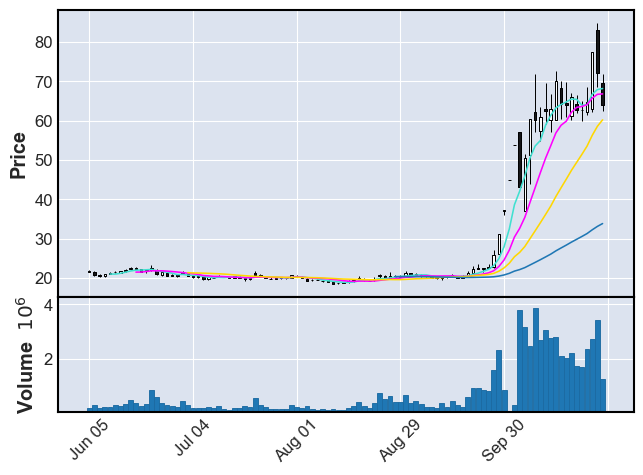

润和软件-周期：weekly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2012-07-20  300339  28.00  24.19  28.00  23.21    305187  7.533086e+08   
1    2012-07-27  300339  23.51  24.80  27.00  21.78    379070  9.502016e+08   
2    2012-08-03  300339  24.30  23.72  25.17  22.02    178747  4.147968e+08   
3    2012-08-10  300339  23.41  24.92  25.57  23.20    155756  3.791379e+08   
4    2012-08-17  300339  24.80  24.76  25.90  24.06     87260  2.188727e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
597  2024-09-30  300339  37.00  37.37  37.37  35.99    832555  3.087031e+09   
598  2024-10-11  300339  44.84  50.38  57.13  36.99   7308374  3.496253e+10   
599  2024-10-18  300339  51.30  62.95  71.80  44.00  14817974  9.110576e+10   
600  2024-10-25  300339  60.20  62.59  72.58  60.01  10846762  7.096691e+10   
601  2024-11-01  300339  62.66  64.20  84.84  60.00  11372443  8.030959e+10   

        振幅    涨跌幅    涨跌额     换手率  
0

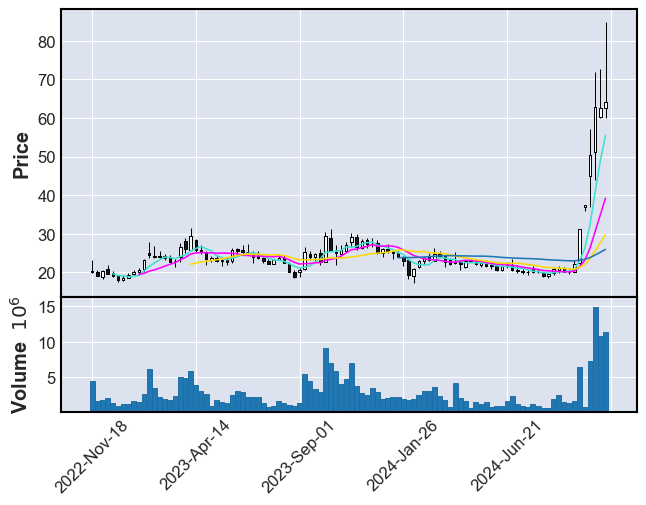

润和软件-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2012-07-31  300339  28.00  22.20  28.00  21.78    769468  1.904240e+09   
1    2012-08-31  300339  22.05  26.35  27.88  22.02    518439  1.285591e+09   
2    2012-09-28  300339  26.25  24.40  29.16  23.64    259629  6.996420e+08   
3    2012-10-31  300339  24.40  25.38  26.60  23.70     99730  2.513733e+08   
4    2012-11-30  300339  25.38  20.70  26.10  20.10     73468  1.762272e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
140  2024-07-31  300339  20.60  20.66  21.89  19.24   4915497  1.005085e+10   
141  2024-08-30  300339  20.51  21.24  21.76  18.47   6279256  1.266894e+10   
142  2024-09-30  300339  21.20  37.37  37.37  19.48  11942154  2.945327e+10   
143  2024-10-31  300339  44.84  72.00  84.84  36.99  43109486  2.690822e+11   
144  2024-11-01  300339  69.50  64.22  71.88  62.30   1237915  8.274466e+09   

         振幅    涨跌幅    涨跌额     换手率  

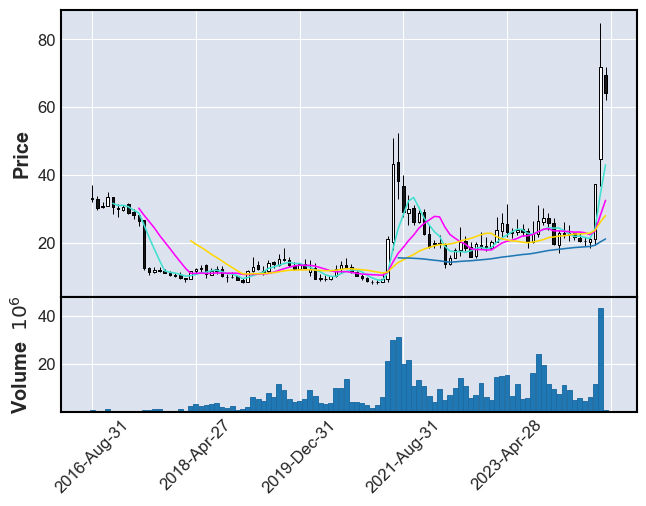

In [32]:
stocksymb='300339'
periods=['daily','weekly','monthly']
stockDict=plotDcStocks(stocksymb,periods)

### 4.1.2 盘口信息汇总
#### 4.1.2.1 成交和挂单明细
获取腾讯当日历史分笔数据

In [33]:
# 根据code代码返回“交易所+代码” 信息，或者反过来
def transferExSym(code):
    if len(code)>6:
        rescode=code[-6:]
    else:
        source={}
        source['sh']=ak.stock_sh_a_spot_em()['代码'].to_list()
        source['sz']=ak.stock_sz_a_spot_em()['代码'].to_list()
        source['bj']=ak.stock_bj_a_spot_em()['代码'].to_list()
        for k in source.keys():
            if code in source[k]:
                rescode=k+code
                break
    return rescode

In [34]:
import numpy as np
import matplotlib.pyplot as plt

#区分北交所和沪深股市，刻画市场深度。按照涨跌停板，作为极值，按照价格涨幅的measure度量区间
def priceMarketDepth(df,measure=0.01):

    open_price = df.loc[df['成交时间'] == '09:30:00', '成交价格'].iloc[0]

    # 设置涨跌停板系数
    if stocksymb == 'bj':
        limit_factor = 0.2
    else:
        limit_factor = 0.1

    # 计算最高价和最低价
    high_price = open_price * (1 + limit_factor)
    low_price = open_price * (1 - limit_factor)

    # 定义价格区间，每1%一档
    price_bins = np.round(np.arange(low_price, high_price, (high_price - low_price) * measure),2)

    # 将价格按照区间划分
    df['价格区间'] = pd.cut(df['成交价格'], bins=price_bins, right=False)

    # 按照价格区间汇总成交量
    volume_summary = df.groupby('价格区间',observed=False)['成交量'].sum().reset_index()

    # 新建 df['prop'] 列
    df['prop'] = df['性质'].apply(lambda x: -1 if x == '卖盘' else (1 if x == '买盘' else 0))
    
    # 按照价格区间汇总成交量和 prop 之和
    summary = df.groupby('价格区间',observed=False).agg({
        '成交量': 'sum',
        'prop': 'sum'
    }).reset_index()
    
    # 提取价格区间的中点和边界
    summary['价格'] = summary['价格区间'].apply(lambda x: round(x.mid,2))
    summary['起始价格'] = summary['价格区间'].apply(lambda x: round(x.left,2))
    summary['终止价格'] = summary['价格区间'].apply(lambda x: round(x.right,2))

    # 分离买盘和卖盘数据
    summary['买盘深度'] = summary['prop'].apply(lambda x: x if x > 0 else 0)
    summary['卖盘深度'] = -summary['prop'].apply(lambda x: -x if x < 0 else 0)

    # 绘制市场深度水平条形图
    fig, ax = plt.subplots(figsize=(14, 21))

    # 绘制买卖盘深度图
    ax.barh(summary['价格'], summary['买盘深度'], color='green', label='buy')
    ax.barh(summary['价格'], summary['卖盘深度'], color='red', label='sell')
    
    # 在图上标注区间价格的起始和终止价格
    for index, row in summary.iterrows():
        ax.text(row['买盘深度'] + max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["起始价格"]:.2f}', va='center', ha='left', fontsize=8, color='black')
        ax.text(-row['卖盘深度'] - max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["终止价格"]:.2f}', va='center', ha='right', fontsize=8, color='black')

    # 设置图表标题和标签
    ax.set_title('Market Depth')
    ax.set_xlabel('Depth(Amount)')
    ax.set_ylabel('Price')
    ax.legend()

    
    # 显示图表
    plt.show()
    
    return summary

In [35]:
from rich.console import Console
from rich.table import Table

#美观显示DataFrame表格
class DataFramePretty(object):
    def __init__(self, df: pd.DataFrame, min_max_cols=[]) -> None:
        self.data = df
        self.min_max_cols = min_max_cols

    def __set_min_max_style(self, df: pd.DataFrame):
        imax = self.data.idxmax()
        imin = self.data.idxmin()

        max_tmpl = "[b on red3]{}[/b on red3]"
        min_tmpl = "[i on green3]{}[/i on green3]"

        for col in self.min_max_cols:
            col_idx = imax.index.tolist().index(col)
            val = df.iloc[imax[col], col_idx]
            df.iloc[imax[col], col_idx] = max_tmpl.format(val)

            col_idx = imin.index.tolist().index(col)
            val = df.iloc[imin[col], col_idx]
            df.iloc[imin[col], col_idx] = min_tmpl.format(val)

    def show(self):
        table = Table(
            title="DataFrame",
            title_style="i on dark_cyan",
            header_style="bold cyan",
        )

        # self.data是原始数据
        # df 是用来显示的数据
        df = self.data.copy()
        for col in df.columns:
            df[col] = df[col].astype("str")
            table.add_column(col)

        self.__set_min_max_style(df)

        for idx in range(len(df)):
            table.add_row(*df.iloc[idx].tolist())

        console = Console()
        console.print(table)

In [36]:
#剔除中性单以后，列出活跃买卖市场深度
def plotActiveMarketDepth(stocksymbol):
    
    print(f'市场深度：{stocksymb}')
    #一次性获得历史分笔数据（当天即当天之前的交易时间；隔天即昨天）
    yesterdayTicks=ak.stock_zh_a_tick_tx_js(symbol=transferExSym(stocksymb))
    
    md=priceMarketDepth(yesterdayTicks)
    md = md[(md['买盘深度'] != 0) | (md['卖盘深度'] != 0)]
    mdp=DataFramePretty(md)
    mdp.show()
    return  md

剔除中性盘以后，主动买卖盘的市场深度

市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


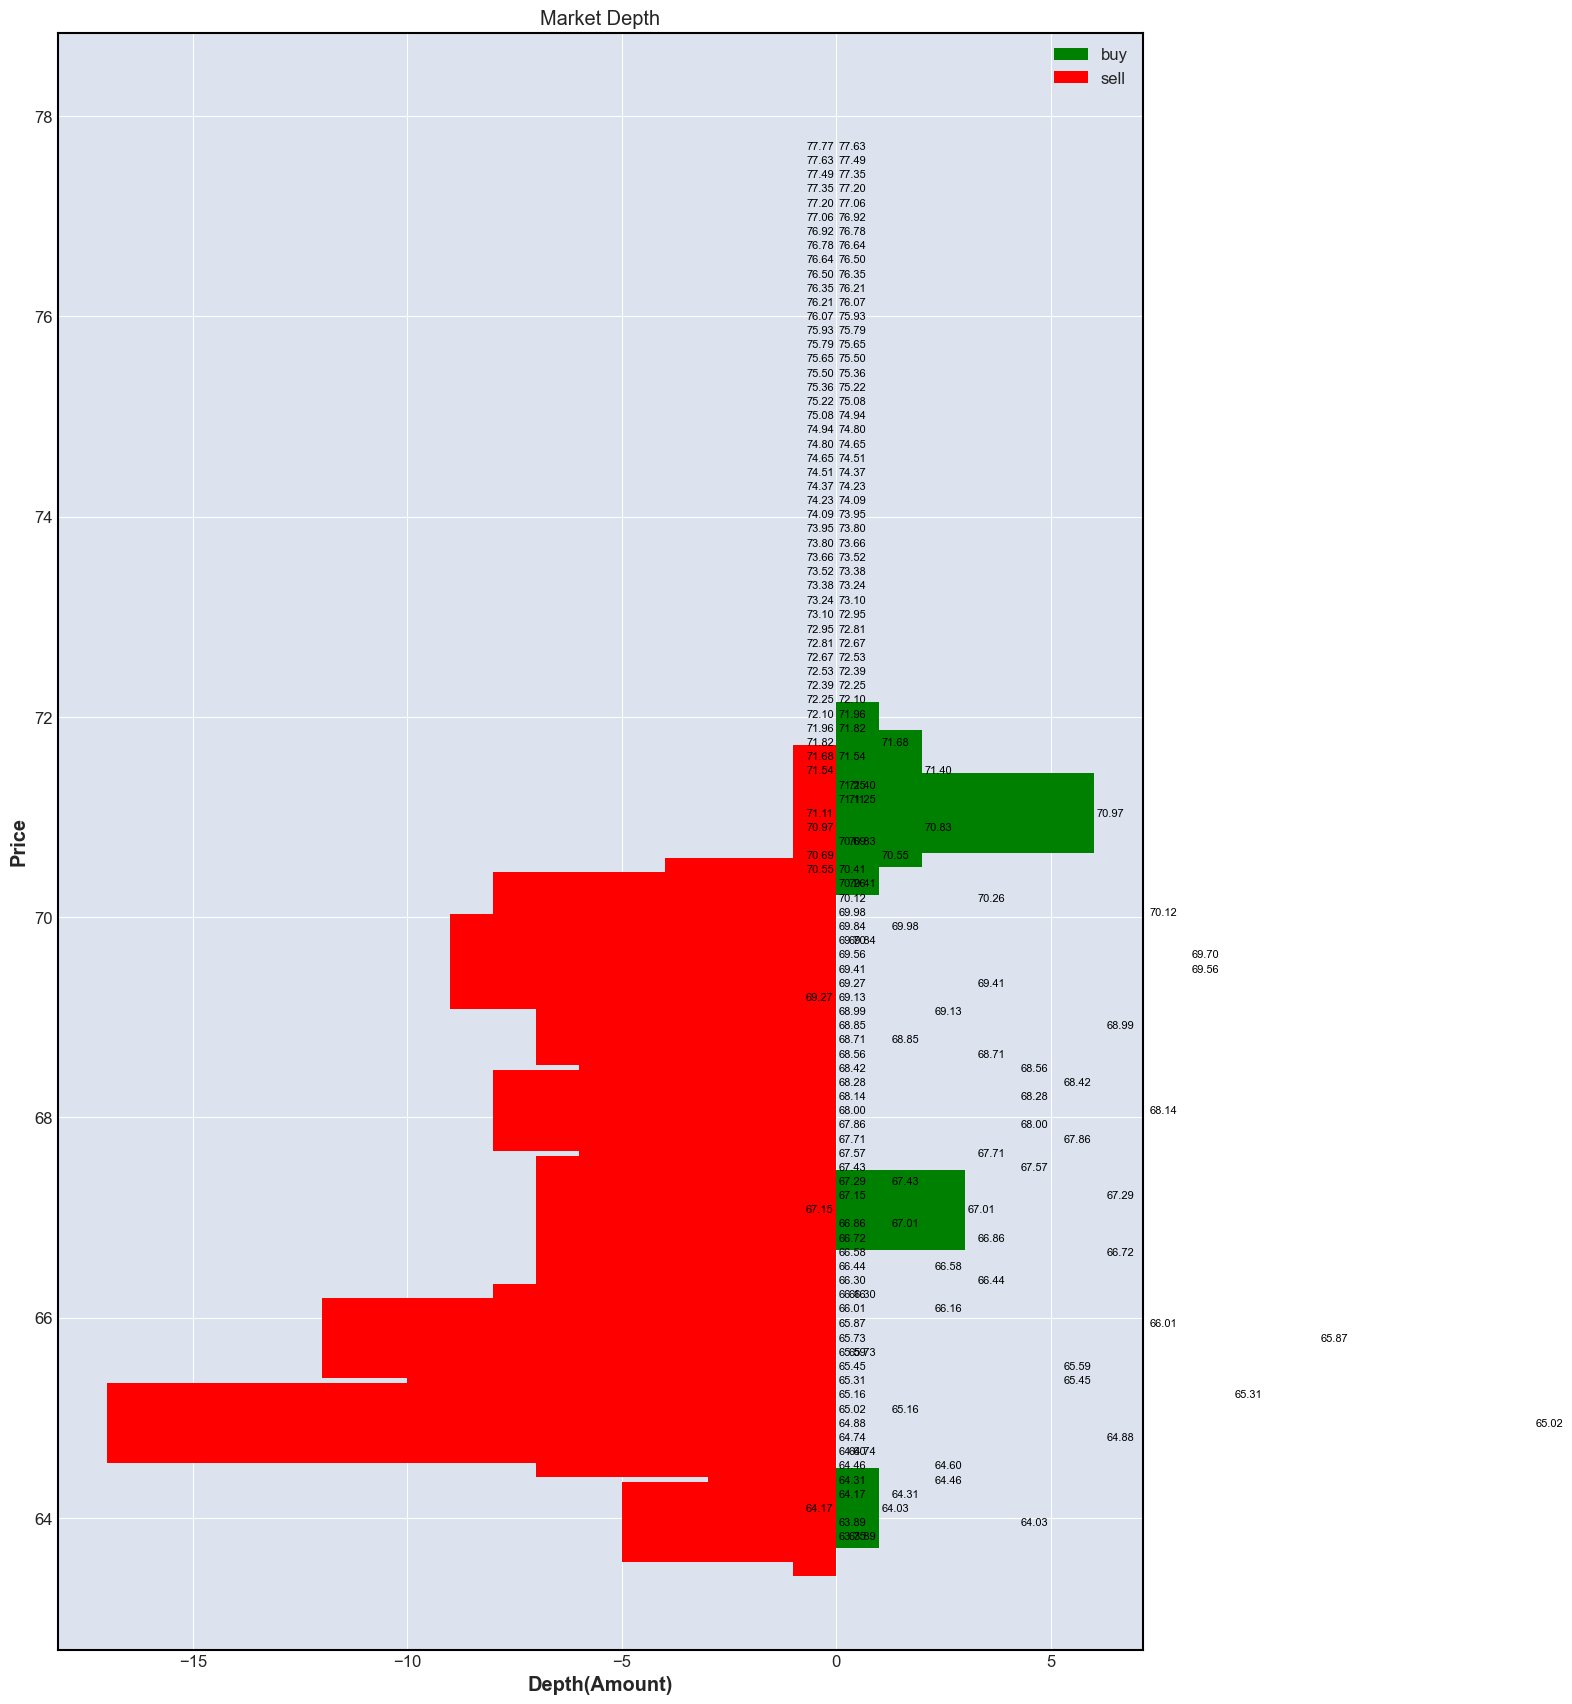

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [63.75, 63.89) │ 22540  │ -1   │ 63.82 │ 63.75    │ 63.89    │ 0        │ -1       │
│ [63.89, 64.03) │ 20767  │ -5   │ 63.96 │ 63.89    │ 64.03    │ 0        │ -5       │
│ [64.03, 64.17) │ 7006   │ 1    │ 64.1  │ 64.03    │ 64.17    │ 1        │ 0        │
│ [64.17, 64.31) │ 6823   │ -2   │ 64.24 │ 64.17    │ 64.31    │ 0        │ -2       │
│ [64.31, 64.46) │ 8651   │ -3   │ 64.38 │ 64.31    │ 64.46    │ 0        │ -3       │
│ [64.46, 64.6)  │ 15429  │ -3   │ 64.53 │ 64.46    │ 64.6     │ 0        │ -3       │
│ [64.6, 64.74)  │ 17697  │ -1   │ 64.67 │ 64.6     │ 64.74    │ 0        │ -1       │
│ [64.74, 64.88) │ 27217  │ -7   │ 64.81 │ 64.74    │ 64.88    │ 0        │ -7       │
│ [64.88, 65.02) │ 55804  │ -17  │ 64.95 │ 64.88    │ 65.02    │ 0        │ -17      │
│ [65.02, 65.16) │ 17309  │ -2   │ 65.09 │ 65.02    │ 65.16    │ 0        │ -2       │
│ [65.16, 65.31) │ 21359  │ -10  │ 65.24 │ 65.16    │ 65.31    │ 0        │ -10      │
│ [65.31, 65.45) │ 7735   │ -6   │ 65.38 │ 65.31    │ 65.45    │ 0        │ -6       │
│ [65.45, 65.59) │ 19913  │ -6   │ 65.52 │ 65.45    │ 65.59    │ 0        │ -6       │
│ [65.59, 65.73) │ 8694   │ -1   │ 65.66 │ 65.59    │ 65.73    │ 0        │ -1       │
│ [65.73, 65.87) │ 24131  │ -12  │ 65.8  │ 65.73    │ 65.87    │ 0        │ -12      │
│ [65.87, 66.01) │ 51132  │ -8   │ 65.94 │ 65.87    │ 66.01    │ 0        │ -8       │
│ [66.01, 66.16) │ 26487  │ -3   │ 66.09 │ 66.01    │ 66.16    │ 0        │ -3       │
│ [66.16, 66.3)  │ 10768  │ -1   │ 66.23 │ 66.16    │ 66.3     │ 0        │ -1       │
│ [66.3, 66.44)  │ 8566   │ -4   │ 66.37 │ 66.3     │ 66.44    │ 0        │ -4       │
│ [66.44, 66.58) │ 27121  │ -3   │ 66.51 │ 66.44    │ 66.58    │ 0        │ -3       │
│ [66.58, 66.72) │ 21005  │ -7   │ 66.65 │ 66.58    │ 66.72    │ 0        │ -7       │
│ [66.72, 66.86) │ 11983  │ -4   │ 66.79 │ 66.72    │ 66.86    │ 0        │ -4       │
│ [66.86, 67.01) │ 43673  │ -2   │ 66.94 │ 66.86    │ 67.01    │ 0        │ -2       │
│ [67.01, 67.15) │ 20773  │ 3    │ 67.08 │ 67.01    │ 67.15    │ 3        │ 0        │
│ [67.15, 67.29) │ 10005  │ -7   │ 67.22 │ 67.15    │ 67.29    │ 0        │ -7       │
│ [67.29, 67.43) │ 10846  │ -2   │ 67.36 │ 67.29    │ 67.43    │ 0        │ -2       │
│ [67.43, 67.57) │ 8111   │ -5   │ 67.5  │ 67.43    │ 67.57    │ 0        │ -5       │
│ [67.57, 67.71) │ 6104   │ -4   │ 67.64 │ 67.57    │ 67.71    │ 0        │ -4       │
│ [67.71, 67.86) │ 14085  │ -6   │ 67.78 │ 67.71    │ 67.86    │ 0        │ -6       │
│ [67.86, 68.0)  │ 8534   │ -5   │ 67.93 │ 67.86    │ 68.0     │ 0        │ -5       │
│ [68.0, 68.14)  │ 29915  │ -8   │ 68.07 │ 68.0     │ 68.14    │ 0        │ -8       │
│ [68.14, 68.28) │ 36371  │ -5   │ 68.21 │ 68.14    │ 68.28    │ 0        │ -5       │
│ [68.28, 68.42) │ 12020  │ -6   │ 68.35 │ 68.28    │ 68.42    │ 0        │ -6       │
│ [68.42, 68.56) │ 19597  │ -5   │ 68.49 │ 68.42    │ 68.56    │ 0        │ -5       │
│ [68.56, 68.71) │ 18374  │ -4   │ 68.63 │ 68.56    │ 68.71    │ 0        │ -4       │
│ [68.71, 68.85) │ 8233   │ -2   │ 68.78 │ 68.71    │ 68.85    │ 0        │ -2       │
│ [68.85, 68.99) │ 19849  │ -7   │ 68.92 │ 68.85    │ 68.99    │ 0        │ -7       │
│ [68.99, 69.13) │ 16805  │ -3   │ 69.06 │ 68.99    │ 69.13    │ 0        │ -3       │
│ [69.27, 69.41) │ 5245   │ -4   │ 69.34 │ 69.27    │ 69.41    │ 0        │ -4       │
│ [69.41, 69.56) │ 65115  │ -9   │ 69.48 │ 69.41    │ 69.56    │ 0        │ -9       │
│ [69.56, 69.7)  │ 56307  │ -9   │ 69.63 │ 69.56    │ 69.7     │ 0        │ -9       │
│ [69.7, 69.84)  │ 16220  │ -1   │ 69.77 │ 69.7     │ 69.84    │ 0        │ -1       │
│ [69.84, 69.98) │ 2532

,价格区间,成交量,prop,价格,起始价格,终止价格,买盘深度,卖盘深度
0,"[63.75, 63.89)",22540,-1,63.82,63.75,63.89,0,-1
1,"[63.89, 64.03)",20767,-5,63.96,63.89,64.03,0,-5
2,"[64.03, 64.17)",7006,1,64.10,64.03,64.17,1,0
3,"[64.17, 64.31)",6823,-2,64.24,64.17,64.31,0,-2
4,"[64.31, 64.46)",8651,-3,64.38,64.31,64.46,0,-3
5,"[64.46, 64.6)",15429,-3,64.53,64.46,64.60,0,-3
6,"[64.6, 64.74)",17697,-1,64.67,64.60,64.74,0,-1
7,"[64.74, 64.88)",27217,-7,64.81,64.74,64.88,0,-7
8,"[64.88, 65.02)",55804,-17,64.95,64.88,65.02,0,-17
9,"[65.02, 65.16)",17309,-2,65.09,65.02,65.16,0,-2


In [37]:
plotActiveMarketDepth(stocksymb)

### 4.1.3 个股追踪

容大感光-周期：daily
              日期    股票代码     开盘     收盘     最高     最低     成交量           成交额  \
0     2016-12-20  300576   9.89  11.87  11.87   9.89      84  9.803500e+04   
1     2016-12-21  300576  13.06  13.06  13.06  13.06      20  2.612000e+04   
2     2016-12-22  300576  14.37  14.37  14.37  14.37      11  1.580700e+04   
3     2016-12-23  300576  15.81  15.81  15.81  15.81      35  5.533500e+04   
4     2016-12-26  300576  17.39  17.39  17.39  17.39      39  6.782100e+04   
...          ...     ...    ...    ...    ...    ...     ...           ...   
1895  2024-10-28  300576  48.75  49.49  49.66  47.76  161420  7.884177e+08   
1896  2024-10-29  300576  49.49  50.20  51.64  48.82  272730  1.366668e+09   
1897  2024-10-30  300576  49.20  51.70  52.00  49.02  281795  1.427981e+09   
1898  2024-10-31  300576  51.10  53.82  55.25  49.65  408023  2.154218e+09   
1899  2024-11-01  300576  53.00  52.73  56.56  51.41  197533  1.075120e+09   

         振幅    涨跌幅   涨跌额    换手率  
0     24.03  44

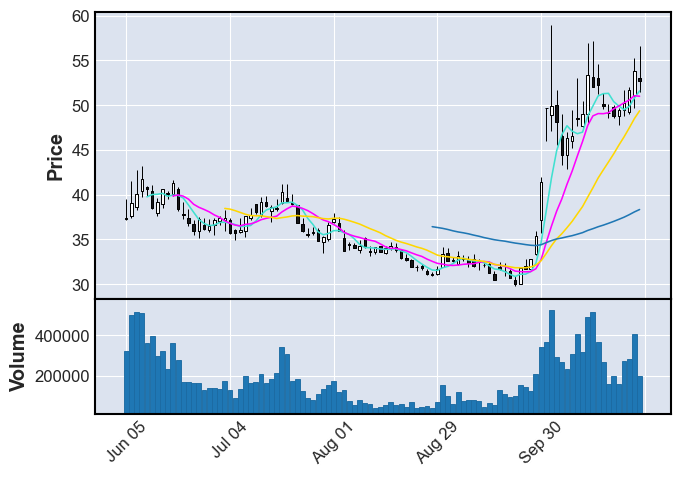

容大感光-周期：weekly
             日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0    2016-12-23  300576   9.89  15.81  15.81   9.89      150  1.952970e+05   
1    2016-12-30  300576  17.39  25.45  25.45  17.39      239  5.274280e+05   
2    2017-01-06  300576  28.00  37.27  37.27  28.00     1382  4.588265e+06   
3    2017-01-13  300576  41.00  44.99  49.00  41.00   274981  1.270494e+09   
4    2017-01-20  300576  44.10  41.00  44.30  38.47   266327  1.094907e+09   
..          ...     ...    ...    ...    ...    ...      ...           ...   
395  2024-09-30  300576  37.20  41.38  41.97  35.70   340237  1.323581e+09   
396  2024-10-11  300576  49.66  44.38  58.98  43.30  1453032  7.144060e+09   
397  2024-10-18  300576  44.39  53.35  56.98  42.87  1756876  8.646117e+09   
398  2024-10-25  300576  53.19  48.73  57.16  48.60  1506916  7.825647e+09   
399  2024-11-01  300576  48.75  52.76  56.56  47.76  1321840  6.814199e+09   

        振幅    涨跌幅    涨跌额     换手率  
0    71.84  9

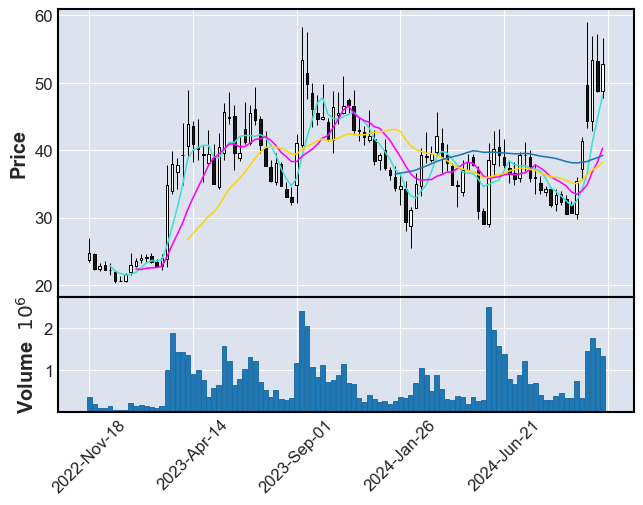

容大感光-周期：monthly
            日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0   2016-12-30  300576   9.89  25.45  25.45   9.89      389  7.227250e+05   
1   2017-01-26  300576  28.00  41.80  49.00  28.00   645691  2.793503e+09   
2   2017-02-28  300576  42.00  46.25  46.48  40.60   577638  2.535418e+09   
3   2017-03-31  300576  46.23  44.79  52.50  44.40   625741  3.038817e+09   
4   2017-04-28  300576  43.99  40.30  46.98  36.08   185168  7.561082e+08   
..         ...     ...    ...    ...    ...    ...      ...           ...   
91  2024-07-31  300576  36.57  36.60  41.20  33.53  3828562  1.447531e+10   
92  2024-08-30  300576  36.96  33.38  38.00  30.90  1650007  5.620156e+09   
93  2024-09-30  300576  33.45  41.38  41.97  29.78  2197749  7.319578e+09   
94  2024-10-31  300576  49.66  53.82  58.98  42.87  5840792  2.935311e+10   
95  2024-11-01  300576  53.00  52.66  56.56  51.41   198081  1.078010e+09   

        振幅     涨跌幅    涨跌额     换手率  
0   188.83  208.86  17.

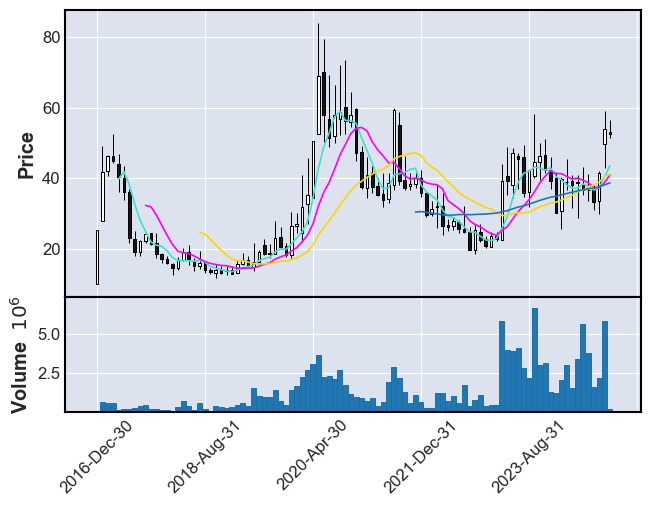

容大感光（300576）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


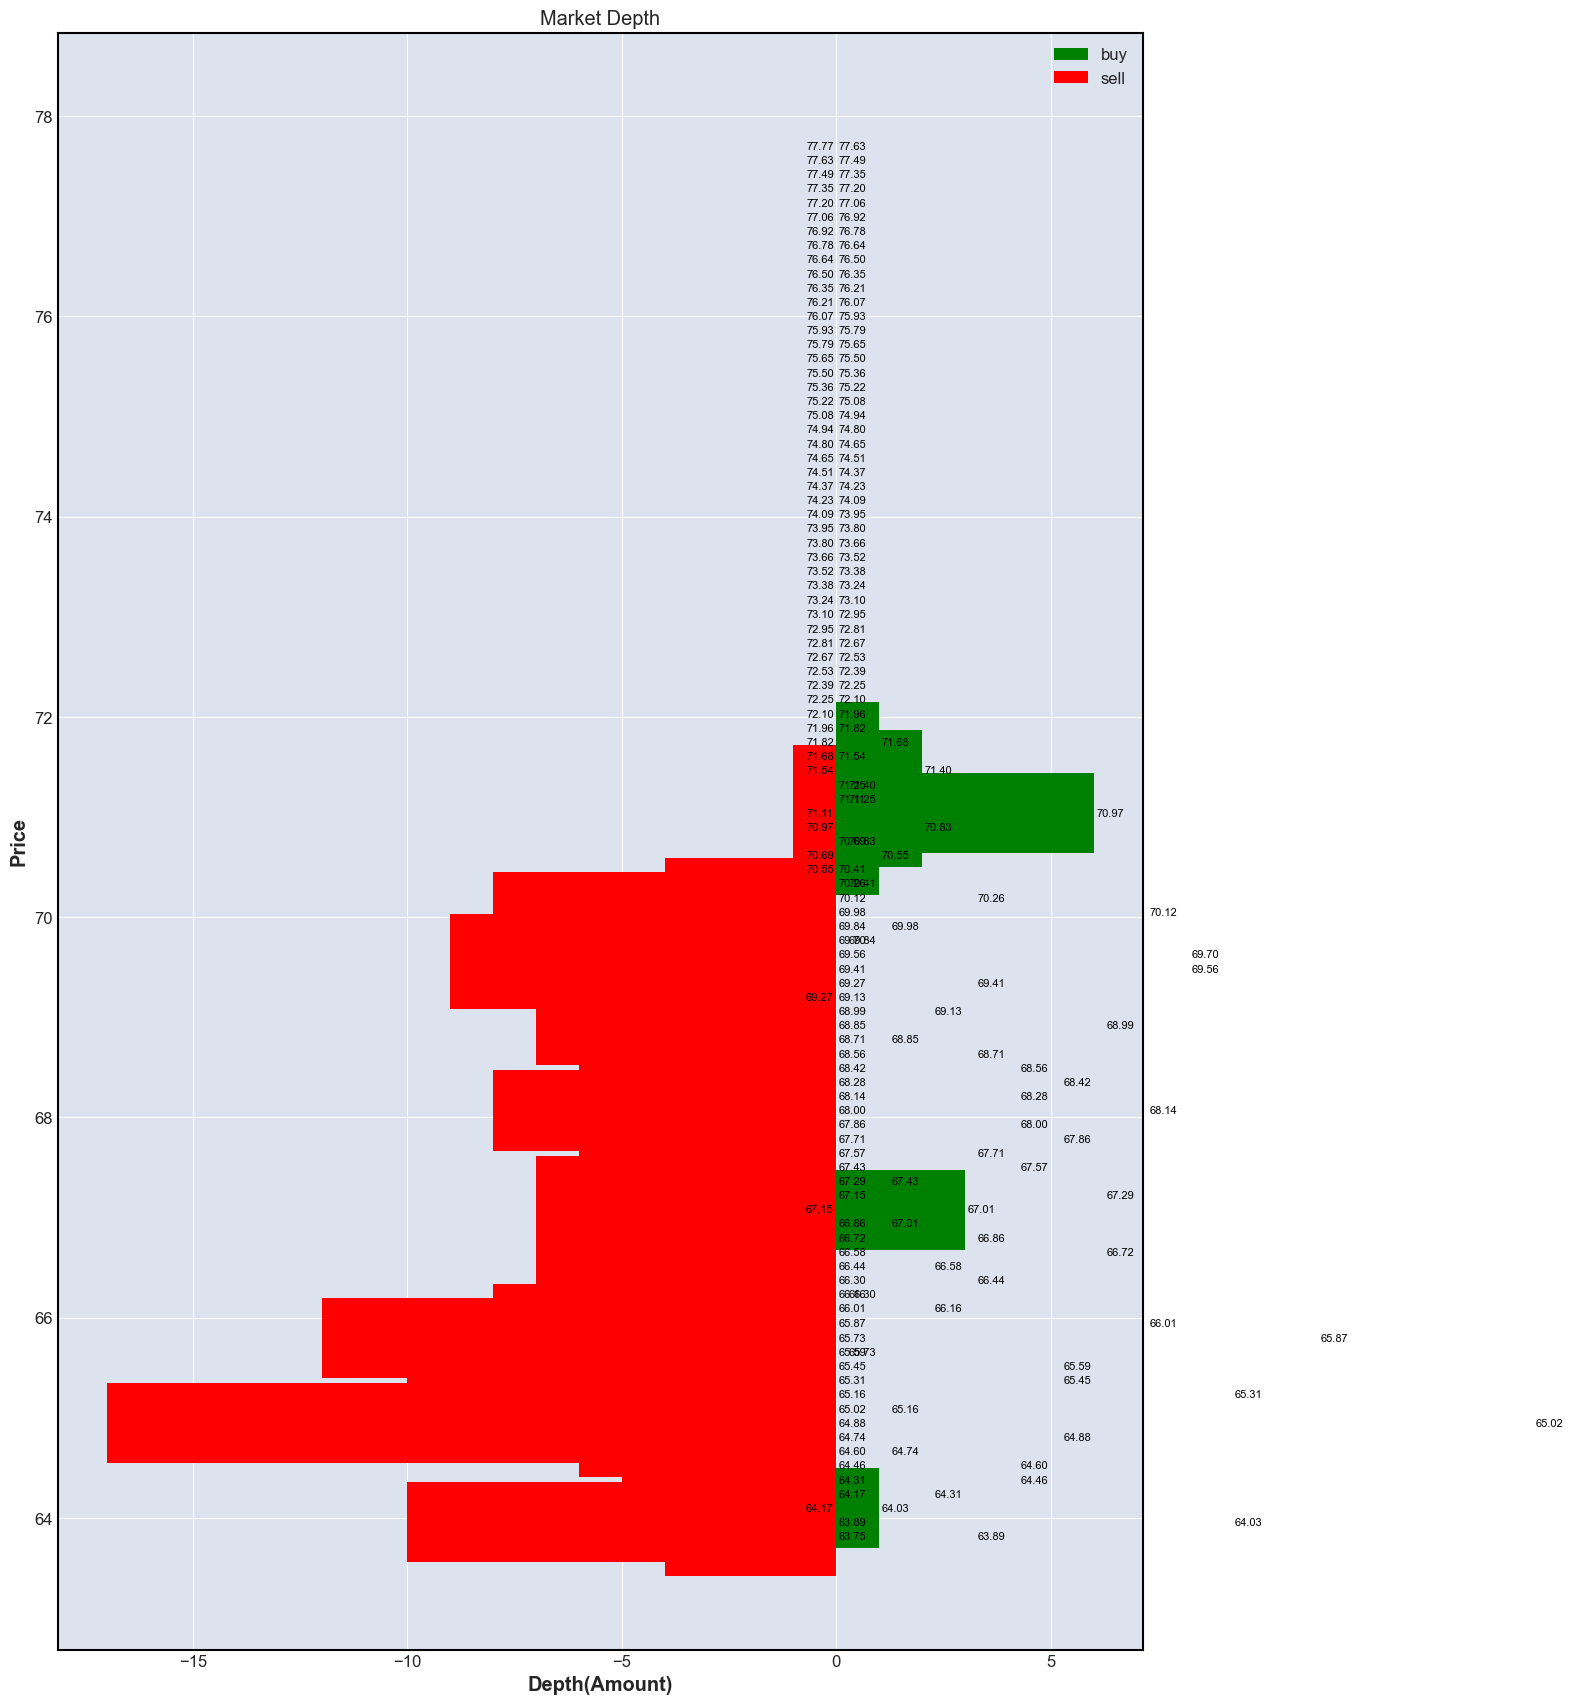

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [63.75, 63.89) │ 24011  │ -4   │ 63.82 │ 63.75    │ 63.89    │ 0        │ -4       │
│ [63.89, 64.03) │ 23007  │ -10  │ 63.96 │ 63.89    │ 64.03    │ 0        │ -10      │
│ [64.03, 64.17) │ 7006   │ 1    │ 64.1  │ 64.03    │ 64.17    │ 1        │ 0        │
│ [64.17, 64.31) │ 7521   │ -3   │ 64.24 │ 64.17    │ 64.31    │ 0        │ -3       │
│ [64.31, 64.46) │ 9809   │ -5   │ 64.38 │ 64.31    │ 64.46    │ 0        │ -5       │
│ [64.46, 64.6)  │ 17445  │ -5   │ 64.53 │ 64.46    │ 64.6     │ 0        │ -5       │
│ [64.6, 64.74)  │ 23475  │ -2   │ 64.67 │ 64.6     │ 64.74    │ 0        │ -2       │
│ [64.74, 64.88) │ 27930  │ -6   │ 64.81 │ 64.74    │ 64.88    │ 0        │ -6       │
│ [64.88, 65.02) │ 55804  │ -17  │ 64.95 │ 64.88    │ 65.02    │ 0        │ -17      │
│ [65.02, 65.16) │ 17309  │ -2   │ 65.09 │ 65.02    │ 65.16    │ 0        │ -2       │
│ [65.16, 65.31) │ 21359  │ -10  │ 65.24 │ 65.16    │ 65.31    │ 0        │ -10      │
│ [65.31, 65.45) │ 7735   │ -6   │ 65.38 │ 65.31    │ 65.45    │ 0        │ -6       │
│ [65.45, 65.59) │ 19913  │ -6   │ 65.52 │ 65.45    │ 65.59    │ 0        │ -6       │
│ [65.59, 65.73) │ 8694   │ -1   │ 65.66 │ 65.59    │ 65.73    │ 0        │ -1       │
│ [65.73, 65.87) │ 24131  │ -12  │ 65.8  │ 65.73    │ 65.87    │ 0        │ -12      │
│ [65.87, 66.01) │ 51132  │ -8   │ 65.94 │ 65.87    │ 66.01    │ 0        │ -8       │
│ [66.01, 66.16) │ 26487  │ -3   │ 66.09 │ 66.01    │ 66.16    │ 0        │ -3       │
│ [66.16, 66.3)  │ 10768  │ -1   │ 66.23 │ 66.16    │ 66.3     │ 0        │ -1       │
│ [66.3, 66.44)  │ 8566   │ -4   │ 66.37 │ 66.3     │ 66.44    │ 0        │ -4       │
│ [66.44, 66.58) │ 27121  │ -3   │ 66.51 │ 66.44    │ 66.58    │ 0        │ -3       │
│ [66.58, 66.72) │ 21005  │ -7   │ 66.65 │ 66.58    │ 66.72    │ 0        │ -7       │
│ [66.72, 66.86) │ 11983  │ -4   │ 66.79 │ 66.72    │ 66.86    │ 0        │ -4       │
│ [66.86, 67.01) │ 43673  │ -2   │ 66.94 │ 66.86    │ 67.01    │ 0        │ -2       │
│ [67.01, 67.15) │ 20773  │ 3    │ 67.08 │ 67.01    │ 67.15    │ 3        │ 0        │
│ [67.15, 67.29) │ 10005  │ -7   │ 67.22 │ 67.15    │ 67.29    │ 0        │ -7       │
│ [67.29, 67.43) │ 10846  │ -2   │ 67.36 │ 67.29    │ 67.43    │ 0        │ -2       │
│ [67.43, 67.57) │ 8111   │ -5   │ 67.5  │ 67.43    │ 67.57    │ 0        │ -5       │
│ [67.57, 67.71) │ 6104   │ -4   │ 67.64 │ 67.57    │ 67.71    │ 0        │ -4       │
│ [67.71, 67.86) │ 14085  │ -6   │ 67.78 │ 67.71    │ 67.86    │ 0        │ -6       │
│ [67.86, 68.0)  │ 8534   │ -5   │ 67.93 │ 67.86    │ 68.0     │ 0        │ -5       │
│ [68.0, 68.14)  │ 29915  │ -8   │ 68.07 │ 68.0     │ 68.14    │ 0        │ -8       │
│ [68.14, 68.28) │ 36371  │ -5   │ 68.21 │ 68.14    │ 68.28    │ 0        │ -5       │
│ [68.28, 68.42) │ 12020  │ -6   │ 68.35 │ 68.28    │ 68.42    │ 0        │ -6       │
│ [68.42, 68.56) │ 19597  │ -5   │ 68.49 │ 68.42    │ 68.56    │ 0        │ -5       │
│ [68.56, 68.71) │ 18374  │ -4   │ 68.63 │ 68.56    │ 68.71    │ 0        │ -4       │
│ [68.71, 68.85) │ 8233   │ -2   │ 68.78 │ 68.71    │ 68.85    │ 0        │ -2       │
│ [68.85, 68.99) │ 19849  │ -7   │ 68.92 │ 68.85    │ 68.99    │ 0        │ -7       │
│ [68.99, 69.13) │ 16805  │ -3   │ 69.06 │ 68.99    │ 69.13    │ 0        │ -3       │
│ [69.27, 69.41) │ 5245   │ -4   │ 69.34 │ 69.27    │ 69.41    │ 0        │ -4       │
│ [69.41, 69.56) │ 65115  │ -9   │ 69.48 │ 69.41    │ 69.56    │ 0        │ -9       │
│ [69.56, 69.7)  │ 56307  │ -9   │ 69.63 │ 69.56    │ 69.7     │ 0        │ -9       │
│ [69.7, 69.84)  │ 16220  │ -1   │ 69.77 │ 69.7     │ 69.84    │ 0        │ -1       │
│ [69.84, 69.98) │ 2532

四川长虹-周期：daily
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     1994-03-11  600839  16.80  19.69  20.50  16.60   261990  4.998470e+08   
1     1994-03-14  600839  21.00  19.80  21.50  19.40   107229  2.192590e+08   
2     1994-03-15  600839  19.80  19.25  20.48  19.12    37734  7.467700e+07   
3     1994-03-16  600839  19.20  19.28  20.02  19.10    24602  4.795900e+07   
4     1994-03-17  600839  19.55  18.60  19.59  18.02    16785  3.193100e+07   
...          ...     ...    ...    ...    ...    ...      ...           ...   
7275  2024-10-28  600839  11.48  12.38  12.38  11.13  7097061  8.379779e+09   
7276  2024-10-29  600839  13.62  13.62  13.62  12.88  5206544  7.062985e+09   
7277  2024-10-30  600839  14.00  14.98  14.98  13.82  6923887  1.017307e+10   
7278  2024-10-31  600839  16.48  16.48  16.48  14.98  4019956  6.570781e+09   
7279  2024-11-01  600839  17.62  15.27  18.07  14.90  8191951  1.370168e+10   

          振幅      涨跌幅    涨跌额    换手率  

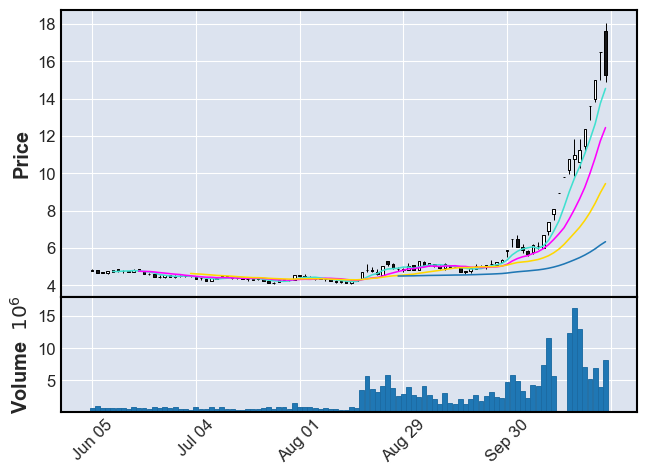

四川长虹-周期：weekly
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1994-03-11  600839  16.80  19.69  20.50  16.60    261990  4.998470e+08   
1     1994-03-18  600839  21.00  17.70  21.50  17.40    209638  4.154680e+08   
2     1994-03-25  600839  17.40  15.39  17.41  15.20     71628  1.181880e+08   
3     1994-04-01  600839  15.00  15.48  16.80  14.62    102736  1.609320e+08   
4     1994-04-08  600839  15.50  15.65  16.59  15.40     64293  1.025340e+08   
...          ...     ...    ...    ...    ...    ...       ...           ...   
1523  2024-09-30  600839   5.81   5.91   5.91   5.52   4810405  2.775233e+09   
1524  2024-10-11  600839   6.50   5.66   6.68   5.56  16405826  1.015380e+10   
1525  2024-10-18  600839   5.77   8.11   8.11   5.67  33013404  2.269582e+10   
1526  2024-10-25  600839   8.92  11.25  11.85   8.92  42141979  4.519061e+10   
1527  2024-11-01  600839  11.48  15.27  18.07  11.13  31444205  4.589563e+10   

          振幅      涨跌幅   

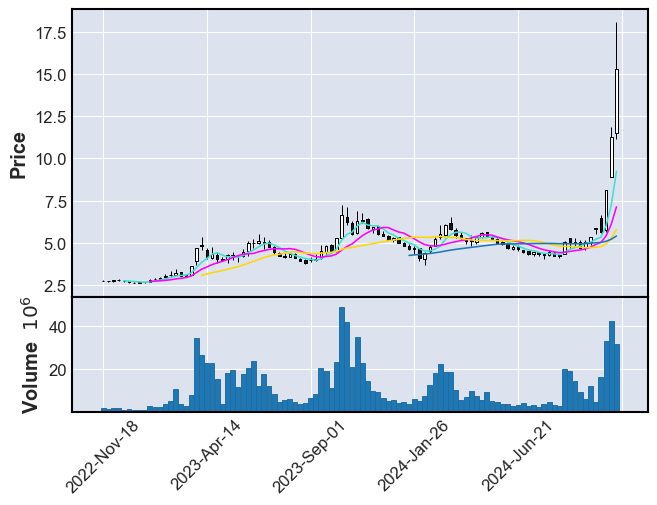

四川长虹-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0    1994-03-31  600839  16.80  15.41  21.50  14.62     638439  1.182779e+09   
1    1994-04-29  600839  15.59  12.91  16.59  12.40     268187  3.796230e+08   
2    1994-05-31  600839  13.00  13.90  16.10  12.86     351145  5.016150e+08   
3    1994-06-30  600839  13.98   9.28  14.75   9.08     243446  2.901890e+08   
4    1994-07-29  600839   9.20   7.33   9.22   7.15     143116  1.147780e+08   
..          ...     ...    ...    ...    ...    ...        ...           ...   
361  2024-07-31  600839   4.51   4.52   4.54   4.06   15152279  6.591300e+09   
362  2024-08-30  600839   4.52   5.04   5.28   4.09   47096018  2.259755e+10   
363  2024-09-30  600839   5.07   5.91   5.91   4.60   46917533  2.402882e+10   
364  2024-10-31  600839   6.50  16.48  16.48   5.56  114808656  1.102268e+11   
365  2024-11-01  600839  17.62  15.31  18.07  14.90    8203233  1.371891e+10   

         振幅      涨跌幅   

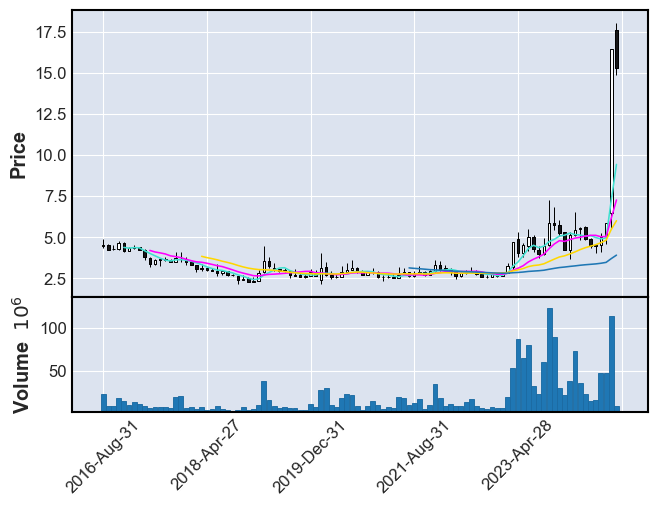

四川长虹（600839）的市场深度：
市场深度：300339


SSLError: HTTPSConnectionPool(host='82.push2delay.eastmoney.com', port=443): Max retries exceeded with url: /api/qt/clist/get?pn=1&pz=50000&po=1&np=1&ut=bd1d9ddb04089700cf9c27f6f7426281&fltt=2&invt=2&fid=f3&fs=m%3A0+t%3A81+s%3A2048&fields=f1%2Cf2%2Cf3%2Cf4%2Cf5%2Cf6%2Cf7%2Cf8%2Cf9%2Cf10%2Cf12%2Cf13%2Cf14%2Cf15%2Cf16%2Cf17%2Cf18%2Cf20%2Cf21%2Cf23%2Cf24%2Cf25%2Cf22%2Cf11%2Cf62%2Cf128%2Cf136%2Cf115%2Cf152&_=1623833739532 (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1006)')))

In [38]:
focusStocks=['300576','600839','600157','000717','002607','600127','600605','600217','300727','301421','002843','600968','300159']
stockCharts,marketDepths={},{}

for f in focusStocks:
    print('='*75)
    stockCharts[f]=plotDcStocks(f,periods)
    stockname=stockCharts[f]['name']
    print(f'{stockname}（{f}）的市场深度：')
    marketDepths[f]=plotActiveMarketDepth(f)
    